In [1]:
# Lab 2: Classification Using KNN and RNN Algorithms

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


In [2]:
# Step 1: Load and Prepare the Dataset
print("="*60)
print("STEP 1: LOAD AND PREPARE THE DATASET")
print("="*60)

# Load the Wine Dataset
wine = load_wine()
X = wine.data
y = wine.target

# Basic data exploration
print("\nDataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"\nFeature names:\n{wine.feature_names}")
print(f"\nTarget names: {wine.target_names}")

# Check class distribution
print("\nClass Distribution:")
unique, counts = np.unique(y, return_counts=True)
for i, count in zip(unique, counts):
    print(f"Class {i} ({wine.target_names[i]}): {count} samples")

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

STEP 1: LOAD AND PREPARE THE DATASET

Dataset Information:
Number of samples: 178
Number of features: 13
Number of classes: 3

Feature names:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target names: ['class_0' 'class_1' 'class_2']

Class Distribution:
Class 0 (class_0): 59 samples
Class 1 (class_1): 71 samples
Class 2 (class_2): 48 samples

Training set size: 142 samples
Testing set size: 36 samples


In [3]:
# Step 2: Implement K-Nearest Neighbors (KNN)
print("\n" + "="*60)
print("STEP 2: IMPLEMENT K-NEAREST NEIGHBORS (KNN)")
print("="*60)

k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

print("\nKNN Results:")
print("-" * 40)
for k in k_values:
    # Create and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)

    print(f"k = {k:2d}: Accuracy = {accuracy:.4f} ({accuracy*100:.2f}%)")


STEP 2: IMPLEMENT K-NEAREST NEIGHBORS (KNN)

KNN Results:
----------------------------------------
k =  1: Accuracy = 0.7778 (77.78%)
k =  5: Accuracy = 0.8056 (80.56%)
k = 11: Accuracy = 0.8056 (80.56%)
k = 15: Accuracy = 0.8056 (80.56%)
k = 21: Accuracy = 0.8056 (80.56%)


In [4]:
# Step 3: Implement Radius Neighbors (RNN)
print("\n" + "="*60)
print("STEP 3: IMPLEMENT RADIUS NEIGHBORS (RNN)")
print("="*60)

radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

print("\nRNN Results:")
print("-" * 40)
for radius in radius_values:
    # Create and train RNN classifier
    rnn = RadiusNeighborsClassifier(radius=radius)
    rnn.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    try:
        y_pred = rnn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        rnn_accuracies.append(accuracy)
        print(f"Radius = {radius}: Accuracy = {accuracy:.4f} ({accuracy*100:.2f}%)")
    except ValueError as e:
        # Handle cases where no neighbors are found
        rnn_accuracies.append(0.0)
        print(f"Radius = {radius}: Error - {str(e)}")


STEP 3: IMPLEMENT RADIUS NEIGHBORS (RNN)

RNN Results:
----------------------------------------
Radius = 350: Accuracy = 0.7222 (72.22%)
Radius = 400: Accuracy = 0.6944 (69.44%)
Radius = 450: Accuracy = 0.6944 (69.44%)
Radius = 500: Accuracy = 0.6944 (69.44%)
Radius = 550: Accuracy = 0.6667 (66.67%)
Radius = 600: Accuracy = 0.6667 (66.67%)



STEP 4: VISUALIZE AND COMPARE RESULTS


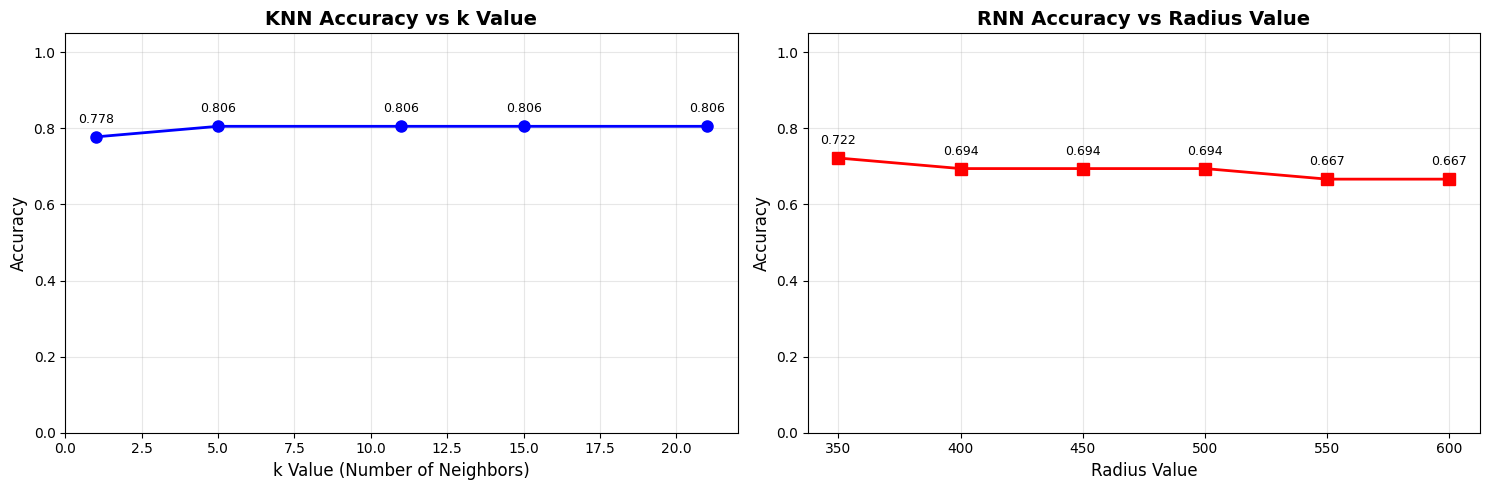


Summary Statistics:
----------------------------------------
KNN Best Accuracy: 0.8056 at k = 5
RNN Best Accuracy: 0.7222 at radius = 350

OBSERVATIONS AND ANALYSIS

1. KNN Performance:
   - Best k value: 5 with accuracy 0.8056
   - Worst k value: 1 with accuracy 0.7778
   - Accuracy range: 0.0278

2. RNN Performance:
   - Best radius: 350 with accuracy 0.7222
   - Worst radius: 550 with accuracy 0.6667
   - Accuracy range: 0.0556

3. Model Comparison:
   - KNN performed better overall


In [5]:
# Step 4: Visualize and Compare Results
print("\n" + "="*60)
print("STEP 4: VISUALIZE AND COMPARE RESULTS")
print("="*60)

# Create subplots for KNN and RNN
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot KNN accuracies
axes[0].plot(k_values, knn_accuracies, marker='o', linewidth=2, markersize=8, color='blue')
axes[0].set_xlabel('k Value (Number of Neighbors)', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('KNN Accuracy vs k Value', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0, 1.05])
for i, (k, acc) in enumerate(zip(k_values, knn_accuracies)):
    axes[0].annotate(f'{acc:.3f}', (k, acc), textcoords="offset points",
                     xytext=(0,10), ha='center', fontsize=9)

# Plot RNN accuracies
axes[1].plot(radius_values, rnn_accuracies, marker='s', linewidth=2, markersize=8, color='red')
axes[1].set_xlabel('Radius Value', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('RNN Accuracy vs Radius Value', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 1.05])
for i, (r, acc) in enumerate(zip(radius_values, rnn_accuracies)):
    axes[1].annotate(f'{acc:.3f}', (r, acc), textcoords="offset points",
                     xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('knn_rnn_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics
print("\nSummary Statistics:")
print("-" * 40)
print(f"KNN Best Accuracy: {max(knn_accuracies):.4f} at k = {k_values[np.argmax(knn_accuracies)]}")
print(f"RNN Best Accuracy: {max(rnn_accuracies):.4f} at radius = {radius_values[np.argmax(rnn_accuracies)]}")

# Comparison and observations
print("\n" + "="*60)
print("OBSERVATIONS AND ANALYSIS")
print("="*60)

print("\n1. KNN Performance:")
print(f"   - Best k value: {k_values[np.argmax(knn_accuracies)]} with accuracy {max(knn_accuracies):.4f}")
print(f"   - Worst k value: {k_values[np.argmin(knn_accuracies)]} with accuracy {min(knn_accuracies):.4f}")
print(f"   - Accuracy range: {max(knn_accuracies) - min(knn_accuracies):.4f}")

print("\n2. RNN Performance:")
print(f"   - Best radius: {radius_values[np.argmax(rnn_accuracies)]} with accuracy {max(rnn_accuracies):.4f}")
print(f"   - Worst radius: {radius_values[np.argmin(rnn_accuracies)]} with accuracy {min(rnn_accuracies):.4f}")
print(f"   - Accuracy range: {max(rnn_accuracies) - min(rnn_accuracies):.4f}")

print("\n3. Model Comparison:")
if max(knn_accuracies) > max(rnn_accuracies):
    print("   - KNN performed better overall")
else:
    print("   - RNN performed better overall")